In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [28]:
data_train_path = 'Fruits_Vegetables/train'
data_train_test = 'Fruits_Vegetables/test'
data_train_val = 'Fruits_Vegetables/validation'

In [29]:
img_width = 180
img_height = 180

In [30]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [31]:
data_cat = data_train.class_names

In [32]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [33]:
data_val = tf.keras.utils.image_dataset_from_directory(data_train_val,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [34]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_train_test,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


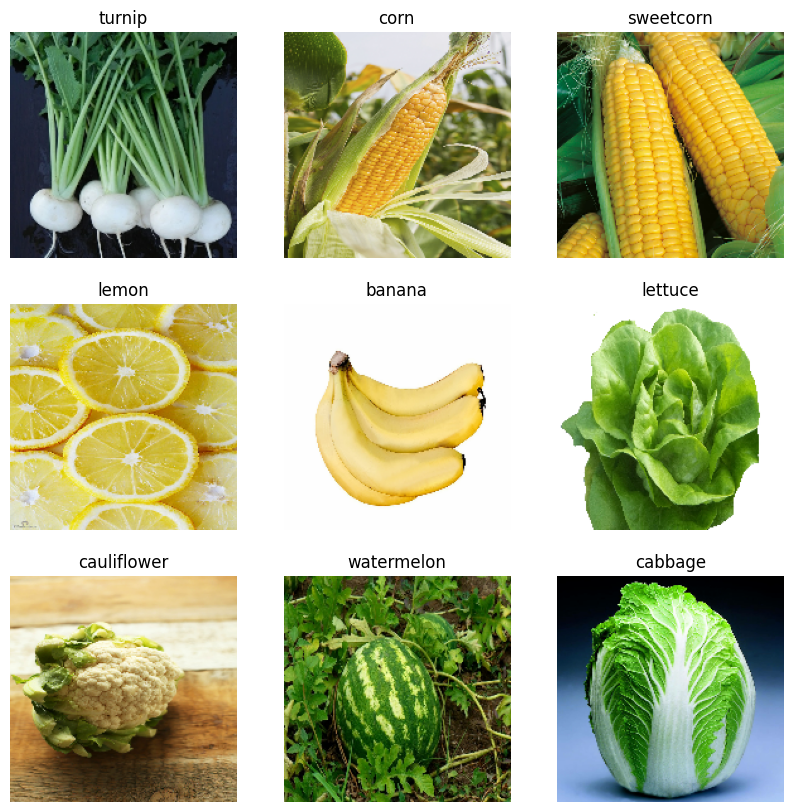

In [35]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [36]:
from tensorflow.keras.models import Sequential

In [37]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [39]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [40]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.0517 - loss: 3.7435 - val_accuracy: 0.2165 - val_loss: 2.6063
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.2429 - loss: 2.6277 - val_accuracy: 0.5470 - val_loss: 1.5928
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 94s 946ms/step - accuracy: 0.4373 - loss: 1.9610 - val_accuracy: 0.7379 - val_loss: 0.9154
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 94s 952ms/step - accuracy: 0.6358 - loss: 1.2675 - val_accuracy: 0.8718 - val_loss: 0.5475
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 897ms/step - accuracy: 0.8034 - loss: 0.6982 - val_accuracy: 0.9288 - val_loss: 0.4083
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 897ms/step - accuracy: 0.8884 - loss: 0.4223 - val_accuracy: 0.9459 - val_loss: 0.4061
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 902ms/step - accuracy: 0.9278 - loss: 0.3222 - val_accuracy: 0.9487 - val_loss: 0.3345
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 95s 963ms/step - accuracy: 0.9601 - loss: 0.2417 - val_accuracy

Text(0.5, 1.0, 'Loss')

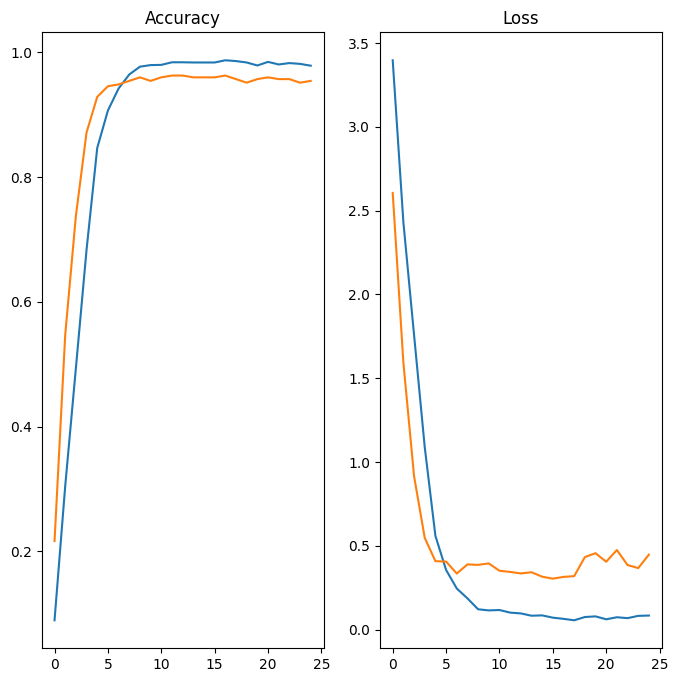

In [41]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [42]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [43]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


In [44]:
score = tf.nn.softmax(predict)

In [45]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 50.50


In [46]:
model.save('Image_classify.keras')